In [58]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv(r"C:\Users\Alexey\Documents\programming\VSCode\python\ML\trening\data\StudentsPerformance.csv")

In [7]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Вывести основные статистические характеристики числовых столбцов (среднее, медиана, стандартное отклонение и т. д.).

In [54]:
features = ["math score", "reading score", "writing score"]

for feature in features:
    print(f"{feature} среднее: {data[feature].mean()}")
    print(f"{feature} медиана: {data[feature].median()}")
    print(f"{feature} std: {data[feature].std()}")
    print(f"{feature} дисперсия: {data[feature].var()}")
    print(f"{feature} мода: {data[feature].mode().iloc[0]}")
    print()


math score среднее: 66.089
math score медиана: 66.0
math score std: 15.16308009600945
math score дисперсия: 229.91899799799796
math score мода: 65

reading score среднее: 69.169
reading score медиана: 70.0
reading score std: 14.600191937252216
reading score дисперсия: 213.16560460460462
reading score мода: 72

writing score среднее: 68.054
writing score медиана: 69.0
writing score std: 15.19565701086965
writing score дисперсия: 230.907991991992
writing score мода: 74



Построить гистограмму (histplot) распределения баллов по математике.

<Axes: xlabel='math score', ylabel='Count'>

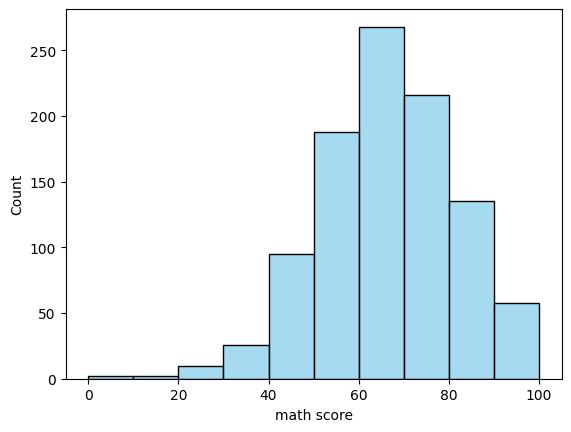

In [56]:
sns.histplot(data=data, x="math score", bins=10, color="skyblue")


Показать средний балл по математике для каждой группы по признаку race/ethnicity.

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64


C:\Users\Alexey\AppData\Local\Temp\ipykernel_1656\982481441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race/ethnicity", y="math score", data=data, estimator=np.mean, palette="pastel")


<Axes: xlabel='race/ethnicity', ylabel='math score'>

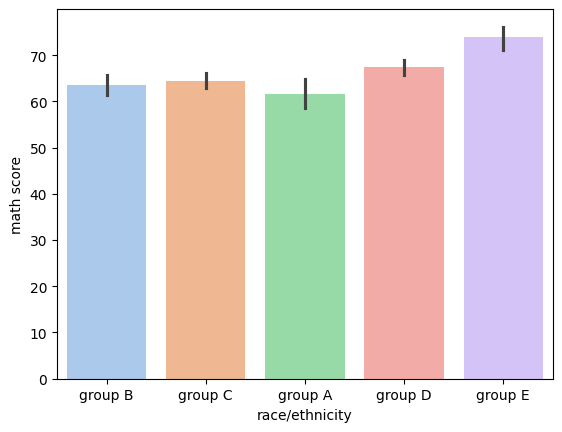

In [59]:
data_sr_race_ethnicity = data.groupby(["race/ethnicity"])["math score"].mean()
print(data_sr_race_ethnicity)

sns.barplot(x="race/ethnicity", y="math score", data=data, estimator=np.mean, palette="pastel")

Создать новый столбец total_score, суммирующий баллы за математику, чтение и письмо.

In [53]:
data["total score"] = data["math score"] + data["reading score"] + data["writing score"]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Построить boxplot для сравнения распределения баллов по математике между студентами, прошедшими и не прошедшими подготовительный курс.

C:\Users\Alexey\AppData\Local\Temp\ipykernel_1656\1272663035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="test preparation course", y="math score", data=data, palette="pastel")


<Axes: xlabel='test preparation course', ylabel='math score'>

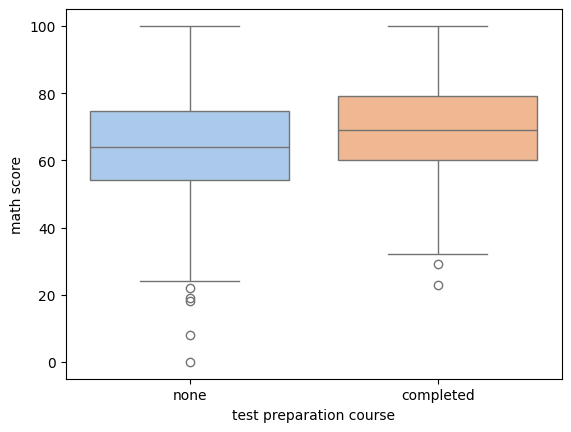

In [62]:
sns.boxplot(x="test preparation course", y="math score", data=data, palette="pastel")

<Axes: xlabel='test preparation course', ylabel='math score'>

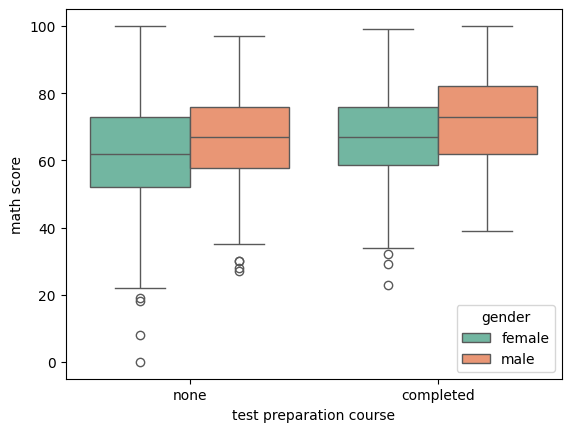

In [61]:
sns.boxplot(x="test preparation course", y="math score", hue="gender", data=data, palette="Set2")